In [1]:
from pydataset import data
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire as aq
import prepare as prep
import warnings

warnings.filterwarnings("ignore")

### Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
# aquire and prepare titanic data
titanic = aq.get_titanic_data()
df = prep.prep_titanic(titanic)

# train, validate, test
train, validate, test = df

In [3]:
#work on train dataset
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
631,0,3,51.0,0,0,7.0542,1,1,0,1
108,0,3,38.0,0,0,7.8958,1,1,0,1
365,0,3,30.0,0,0,7.2500,1,1,0,1
701,1,1,35.0,0,0,26.2875,1,1,0,1
449,1,1,52.0,0,0,30.5000,1,1,0,1


- #### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
# get the baseline 1 (True) = Yes, 0 = No (False)
train.survived.value_counts()

0    256
1    180
Name: survived, dtype: int64

In [5]:
# there are more deaths than survivals so deaths will be the baseline
# calculate the baseline
baseline = (train.survived == 0).mean()
baseline

0.5871559633027523

In [6]:
# create X & y version of train, where y is a series with
#just the target variable and X are all the features. 

#train dataset
X_train = train.drop(columns=['survived'])
y_train = train.survived

# validate dataset
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

# Test dataset
X_test = test.drop(columns=['survived'])
y_test = test.survived

In [7]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
631,3,51.0,0,0,7.0542,1,1,0,1
108,3,38.0,0,0,7.8958,1,1,0,1
365,3,30.0,0,0,7.2500,1,1,0,1
701,1,35.0,0,0,26.2875,1,1,0,1
449,1,52.0,0,0,30.5000,1,1,0,1


### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [8]:
# create Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [9]:
# fit train model
clf = clf.fit(X_train,y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.485\nsamples = 436\nvalue = [256, 180]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.404\nsamples = 167\nvalue = [47, 120]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.5\ngini = 0.101\nsamples = 94\nvalue = [5, 89]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.083\nsamples = 92\nvalue = [4, 88]\nclass = 1'),
 Text(272.025, 142.695, 'fare <= 23.35\ngini = 0.489\nsamples = 73\nvalue = [42, 31]\nclass = 0'),
 Text(226.6875, 47.565, 'gini = 0.5\nsamples = 59\nvalue = [29, 30]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 6.5\ngini = 0.347\nsamples = 269\nvalue = [209, 60]\nclass = 0'),
 Text(453.375, 142.695, 'sibsp <= 2.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = 1'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass =

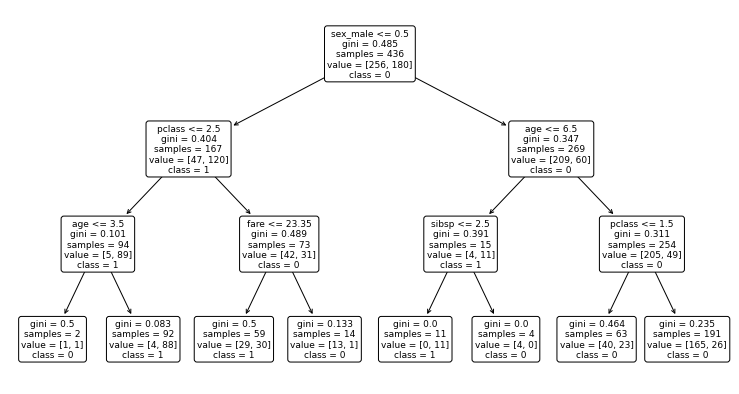

In [10]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns,
          class_names=clf.classes_.astype(str), rounded=True)

In [11]:
train['prediction'] = clf.predict(X_train)

In [12]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,prediction
631,0,3,51.0,0,0,7.0542,1,1,0,1,0
108,0,3,38.0,0,0,7.8958,1,1,0,1,0
365,0,3,30.0,0,0,7.2500,1,1,0,1,0
701,1,1,35.0,0,0,26.2875,1,1,0,1,0
449,1,1,52.0,0,0,30.5000,1,1,0,1,0


## Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [13]:
# model score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [14]:
y_pred = clf.predict(X_train)

In [15]:
pd.crosstab(train.survived, train.prediction)
# confusion_matrix(train.survived, train.prediction)

prediction,0,1
survived,,
0,223,33
1,51,129


In [16]:
# classfication report
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       256
           1       0.80      0.72      0.75       180

    accuracy                           0.81       436
   macro avg       0.81      0.79      0.80       436
weighted avg       0.81      0.81      0.81       436



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
TP = 233
TN = 129
FP = 51
FN = 33


false_positive = FP/FP+TN
false_negative = FN/FN+TP
true_positive = TP/TP+FN
true_negative = TN/TN+FP

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 130.0
False Negative: 234.0
True Positive: 34.0
True Negative: 52.0
Acurracy: 0.8116591928251121
Precision: 0.5
Recall: 0.8759398496240601


### Run through steps 2-4 using a different max_depth value.

In [18]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [19]:
clf2 = clf2.fit(X_train,y_train)

In [20]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [21]:
train['prediction'] = clf2.predict(X_train)

In [22]:
y_pred = clf2.predict(X_train)

In [23]:
pd.crosstab(train.survived, train.prediction)

prediction,0,1
survived,,
0,250,6
1,70,110


In [24]:
TP = 250
TN = 110
FP = 70
FN = 6


false_positive = FP/FP+TN
false_negative = FN/FN+TP
true_positive = TP/TP+FN
true_negative = TN/TN+FP

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 111.0
False Negative: 251.0
True Positive: 7.0
True Negative: 71.0
Acurracy: 0.8256880733944955
Precision: 0.5
Recall: 0.9765625


In [25]:
y_pred = clf2.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       256
           1       0.95      0.61      0.74       180

    accuracy                           0.83       436
   macro avg       0.86      0.79      0.81       436
weighted avg       0.85      0.83      0.82       436



#### Which model performs better on your in-sample data?
- Second Model Performs better

### Which model performs best on your out-of-sample data, the validate set?

In [26]:
y_val_pred_1 = clf.predict(X_validate)
y_val_pred_2 = clf2.predict(X_validate)

In [27]:
model1_validate_accuracy = clf.score(X_validate, y_validate)
model2_validate_accuracy = clf2.score(X_validate, y_validate)

print('Validate Model 1:',model1_validate_accuracy)
print('Validate Model 2:',model2_validate_accuracy)

Validate Model 1: 0.8351063829787234
Validate Model 2: 0.8031914893617021
